In [108]:
from time import time

import numpy as np
import pandas as pd
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt
import nltk

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FactorAnalysis

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [74]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [75]:
#Importing the training dataset
trainSet  = pd.read_csv('train.csv')
#Encoding the dataset 
trainingEncoded = pd.get_dummies(trainSet)
x = trainingEncoded.drop(['hand'], axis=1)
y = trainingEncoded['hand']
#Splitting the datasets to independent training and test splits for later use (randomly)
xTrain, xVal, yTrain, yVal = train_test_split(x, 
                                              y,
                                              test_size=.1)

np.random.seed(42)

n_samples, n_features = x.shape
n_classes = len(np.unique(y.values.tolist()))
labels = y.values.tolist()
sample_size = 4175

### RUN EVERYTHING TILL HERE ###

In [76]:
# print n_samples
# print n_features
# print n_classes

25010
10
10


In [69]:
# norm = Normalizer()
# normalized_x = norm.fit_transform(x, y)

In [62]:
# n_samples, n_features = normalized_x.shape
# n_classes = len(np.unique(y.values.tolist()))
# labels = y.values.tolist()
# sample_size = 4175

In [77]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_classes, n_samples, n_features))

n_digits: 10, 	 n_samples 25010, 	 n_features 10


In [78]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


In [79]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
bench_k_means(KMeans(init='k-means++', n_clusters=n_classes,n_init=100, max_iter = 10000),
              name="k-means++", data=x)

bench_k_means(KMeans(init='random', n_clusters=n_classes, n_init=100, max_iter = 10000),
              name="random", data=x)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	37.37s	942770	0.005	0.002	0.003	0.001	0.002	0.147
random   	31.29s	942772	0.005	0.002	0.003	0.001	0.002	0.148


In [81]:
pca = PCA(n_components=n_classes).fit(x)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_classes, n_init=1, max_iter = 10000),
              name="PCA-based",
              data=x)

PCA-based	0.52s	943885	0.006	0.003	0.004	0.001	0.002	0.148


In [84]:
ica = FastICA(n_components = n_classes).fit(x)
bench_k_means(KMeans(init=ica.components_, n_clusters = n_classes, n_init=1, max_iter = 10000),
             name="ICA-based", 
             data=x)


ICA-based	0.26s	942967	0.006	0.002	0.003	0.001	0.002	0.148


In [100]:
rp = GaussianRandomProjection(n_components = n_classes).fit(x)
bench_k_means(KMeans(init=rp.components_, n_clusters = n_classes, n_init=1, max_iter = 10000),
             name="RP-based", 
             data=x)


RP-based 	0.26s	943035	0.006	0.003	0.004	0.001	0.002	0.145


In [110]:
fa = FactorAnalysis(n_components = n_classes).fit(x)
bench_k_means(KMeans(init=fa.components_, n_clusters = n_classes, n_init=1, max_iter = 10000),
             name="FactorAnalysis-based", 
             data=x)

FactorAnalysis-based	0.29s	945781	0.006	0.003	0.004	0.001	0.002	0.145


/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


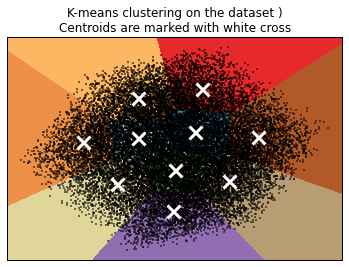

In [7]:
reduced_data = PCA(n_components=2).fit_transform(x)
kmeans = KMeans(init='k-means++', n_clusters=n_classes, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the dataset )\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [90]:
reduced_data = FastICA(n_components=2).fit_transform(x)

In [94]:
print reduced_data

[[-0.00769089 -0.00736465]
 [ 0.00795518 -0.00371181]
 [-0.0085513  -0.00923043]
 ...
 [ 0.00492335 -0.00663632]
 [-0.0128256  -0.00121305]
 [ 0.00650701 -0.00203723]]


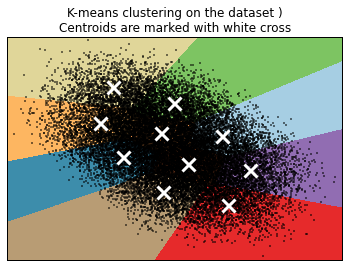

In [104]:
reduced_data = GaussianRandomProjection(n_components=2).fit_transform(x)
kmeans = KMeans(init='k-means++', n_clusters=n_classes, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the dataset )\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

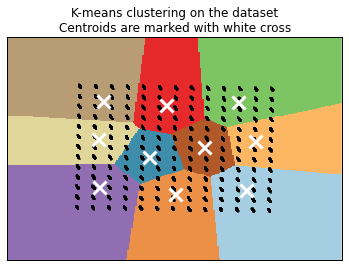

In [112]:
reduced_data = FactorAnalysis(n_components=2).fit_transform(x)
kmeans = KMeans(init='k-means++', n_clusters=n_classes, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [6]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(x)

In [10]:
from sklearn.datasets import load_digits

In [12]:
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

In [14]:
n_samples, n_features = data.shape
n_classes = len(np.unique(digits.target))
labels = digits.target
sample_size = 300

In [17]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
bench_k_means(KMeans(init='k-means++', n_clusters=n_classes, n_init=10),
              name="k-means++", data=data)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.33s	69683	0.676	0.716	0.695	0.562	0.672	0.118
[[  0   0 177   0   0   1   0   0   0   0]
 [ 58  96   0   0   0   0  28   0   0   0]
 [  4  24   1   0   0   0 141   1   0   6]
 [  0   7   0   0   0   0   1   7   8 160]
 [  7   2   0   0   9 158   0   4   1   0]
 [  0   3   0   3   0   2   0   0 128  46]
 [  1   5   1 174   0   0   0   0   0   0]
 [  3   1   0   0  18   0   0 155   2   0]
 [ 12 102   1   2   0   0   1   2   6  48]
 [ 19   2   0   0   3   0   0   8   4 144]]


In [114]:
def bench_em(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t'
          % (name, (time() - t0),
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [120]:
em = GaussianMixture(n_components = n_classes).fit(x)
emPredicted = em.predict(x)

In [129]:
print('homo\tcompl\tv-meas\tARI\tAMI')
print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
      % (metrics.homogeneity_score(y, emPredicted),
      metrics.completeness_score(y, emPredicted),
      metrics.v_measure_score(y, emPredicted),
      metrics.adjusted_rand_score(y, emPredicted),
      metrics.adjusted_mutual_info_score(y, emPredicted)))


homo	compl	v-meas	ARI	AMI
0.005	0.002	0.003	0.001	0.001	


In [133]:
pca = PCA(n_components=n_classes).fit(x)
em_pca = GaussianMixture(init_params=pca.components_, n_components = n_classes).fit(x)
em_pcaPredicted = em_pca.predict(x)
print('homo\tcompl\tv-meas\tARI\tAMI')
print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
      % (metrics.homogeneity_score(y, em_pcaPredicted),
      metrics.completeness_score(y, em_pcaPredicted),
      metrics.v_measure_score(y, em_pcaPredicted),
      metrics.adjusted_rand_score(y, em_pcaPredicted),
      metrics.adjusted_mutual_info_score(y, em_pcaPredicted)))

/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/sklearn/mixture/base.py:145: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.init_params == 'kmeans':
/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/sklearn/mixture/base.py:150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.init_params == 'random':


ValueError: Unimplemented initialization method '[[-1.67277546e-03 -4.11400186e-01 -7.18621472e-04 -6.06802036e-01
   4.47792515e-03  6.26876556e-01  9.16517782e-04 -7.32090917e-03
  -2.94407022e-04  2.63607799e-01]
 [ 3.48374807e-03 -7.04711529e-01 -2.24962629e-03  6.76412210e-01
  -1.21436665e-04  1.80490438e-01 -2.57698293e-03 -1.12364625e-01
  -8.72156229e-04  2.49191289e-02]
 [ 1.21184433e-03 -2.60765377e-01  2.58971108e-03 -8.76280487e-02
   4.38093610e-04 -8.92924526e-02 -3.12993123e-03  8.82090358e-01
   6.42939872e-04 -3.71816655e-01]
 [-4.20209072e-03  2.15263316e-01 -2.96025793e-03  7.48857508e-02
   3.41547279e-03  5.40780784e-01 -1.25437221e-03 -2.04410127e-01
   1.63353417e-03 -7.83443773e-01]
 [-8.44576373e-04  4.68803508e-01  2.01138261e-03  4.01190391e-01
   2.46336948e-03  5.23432246e-01 -1.57740567e-03  4.09178317e-01
   1.51554343e-03  4.21717581e-01]
 [-1.30434483e-01 -1.77092387e-03  5.29986061e-01 -9.45593190e-04
  -6.77051762e-01  3.64469319e-03 -1.71160586e-01 -2.42125467e-03
   4.63015348e-01 -4.44596927e-04]
 [ 8.23723846e-01  3.56409850e-03  7.27243604e-02 -2.99104608e-03
  -3.42965662e-01  5.15214827e-03 -1.65167171e-01 -1.12662777e-03
  -4.13799541e-01 -2.24278995e-03]
 [-2.29631276e-01 -6.64852337e-04  7.04904659e-01  9.32205446e-04
   3.38430844e-01 -1.29951046e-03 -3.08344332e-01 -3.16798477e-03
  -4.90666666e-01 -6.49823987e-04]
 [-1.80165101e-01 -1.24250513e-03  1.73588701e-01  2.47643821e-03
  -3.11230480e-01  2.96116442e-03  8.25161910e-01  2.48507356e-03
  -3.99530527e-01 -1.90971283e-03]
 [-4.68231899e-01  3.41686944e-04 -4.32177318e-01 -8.30571768e-04
  -4.61018032e-01  6.21328880e-04 -4.09187140e-01  1.85944133e-03
  -4.62603591e-01  1.78337963e-03]]'